In [1]:
#make sure you have installed these libraries before getting started
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned dataset
data_path = "../data/cleaned_dataset.csv"  
df = pd.read_csv(data_path)

In [3]:
print("First few rows of the dataset:")
print(df.head())

print("\nSummary of numerical columns:")
print(df.describe())

print("\nSummary of categorical columns:")
print(df.describe(include=['object', 'category']))

First few rows of the dataset:
      CID         TID  Gender     Age Group        Purchase Date  \
0  943146  5876328741  Female         25-45  2023-08-30 20:27:08   
1  180079  1018503182    Male         25-45  2024-02-23 09:33:46   
2  337580  3814082218   Other  60 and above  2022-03-06 09:09:50   
3  180333  1395204173   Other  60 and above  2020-11-04 04:41:57   
4  447553  8009390577    Male         18-25  2022-05-31 17:00:32   

   Product Category Discount Availed    Discount Name  Discount Amount (INR)  \
0       Electronics              Yes        FESTIVE50                  64.30   
1       Electronics              Yes  SEASONALOFFER21                 175.19   
2          Clothing              Yes  SEASONALOFFER21                 211.54   
3  Sports & Fitness               No         NEWYEARS                   0.00   
4  Sports & Fitness              Yes         WELCOME5                 439.92   

   Gross Amount   Net Amount Purchase Method   Location  
0    725.304000   661

In [4]:

df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

df['Purchase Month'] = df['Purchase Date'].dt.to_period('M')


monthly_revenue = df.groupby('Purchase Month')['Net Amount'].sum()

C:\Users\Mysel\AppData\Local\Temp\ipykernel_25144\1973693458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='coolwarm')


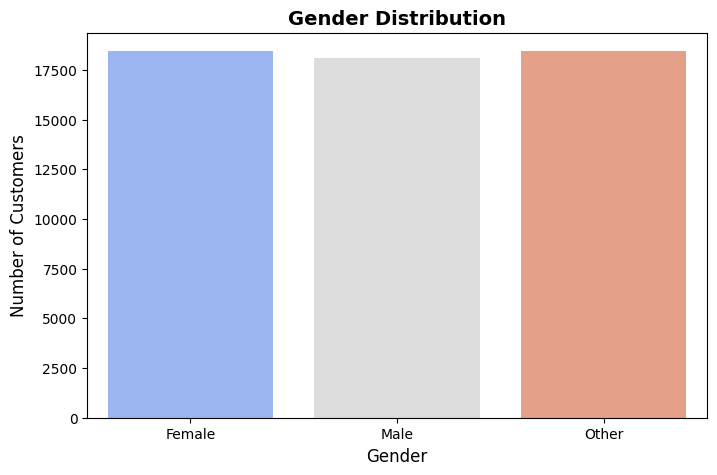

In [5]:
#analysing the customer demographics on gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



C:\Users\Mysel\AppData\Local\Temp\ipykernel_25144\4113613897.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Group', data=df, palette='mako', order=sorted(df['Age Group'].unique()))


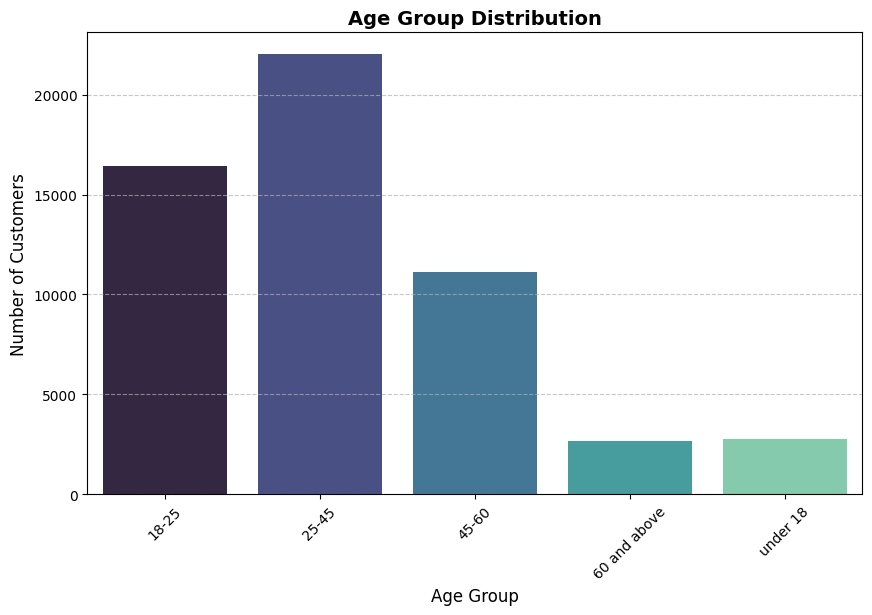

In [6]:
# Age Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', data=df, palette='mako', order=sorted(df['Age Group'].unique()))
plt.title('Age Group Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


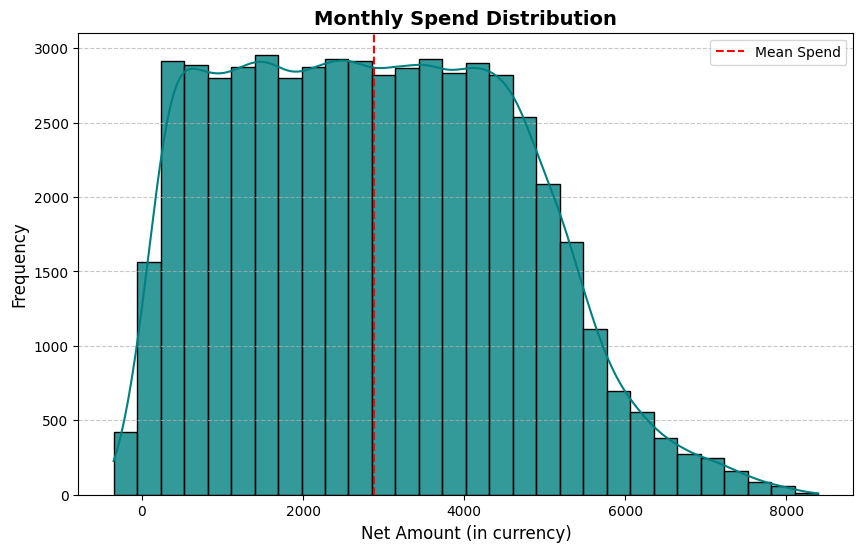

In [7]:
#monthly distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Net Amount'], kde=True, bins=30, color='teal', alpha=0.8)
plt.title('Monthly Spend Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Net Amount (in currency)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.axvline(df['Net Amount'].mean(), color='red', linestyle='--', linewidth=1.5, label='Mean Spend')
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


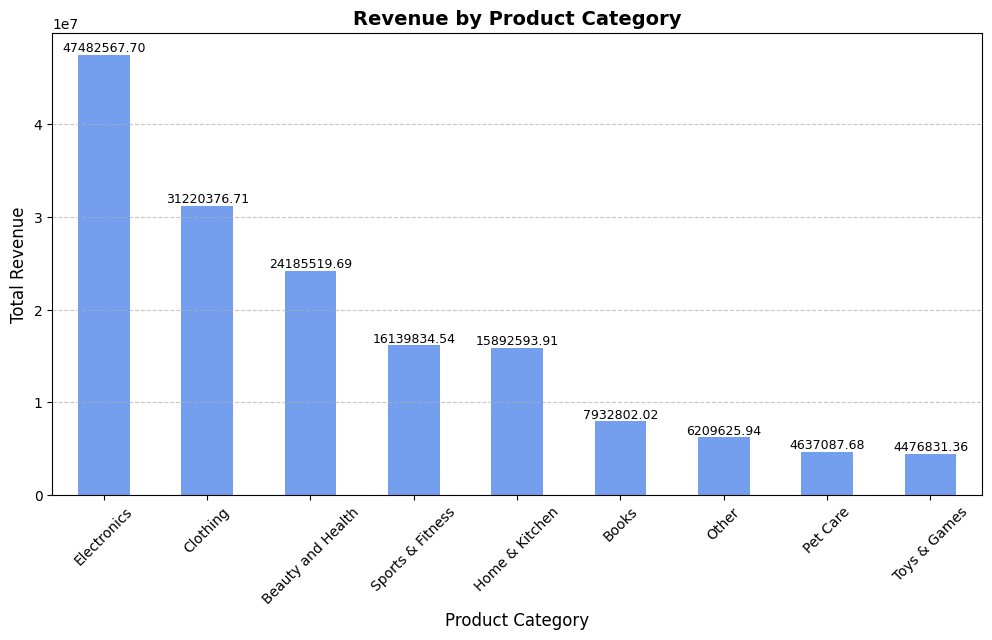

In [8]:
#revenue By product category
plt.figure(figsize=(12, 6))
category_revenue = df.groupby('Product Category')['Net Amount'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', color='cornflowerblue', alpha=0.9)
plt.title('Revenue by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
for index, value in enumerate(category_revenue):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


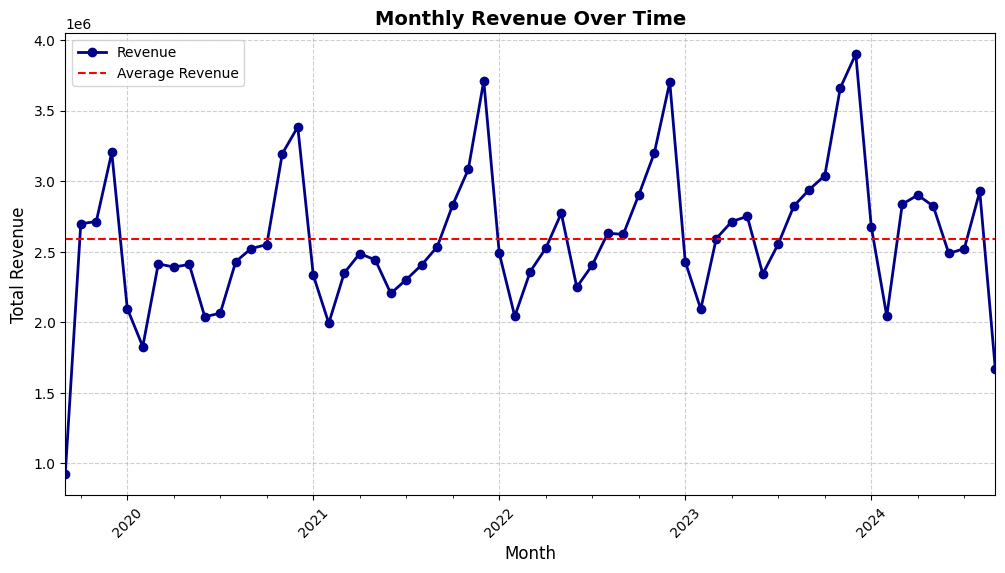

In [9]:
# revenue over time
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='darkblue', linewidth=2, label='Revenue')
plt.title('Monthly Revenue Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.axhline(monthly_revenue.mean(), color='red', linestyle='--', linewidth=1.5, label='Average Revenue')
plt.legend(fontsize=10)
plt.show()
